In [40]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import seaborn as sns

dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imangens_teste, identificacoes_teste)) = dataset.load_data()

### Verificando dados

In [2]:
print('Treino', imagens_treino.shape)
print('Teste', imangens_teste.shape)

Treino (60000, 28, 28)
Teste (10000, 28, 28)


### Exemplo de imagem

Text(0.5, 1.0, '9')

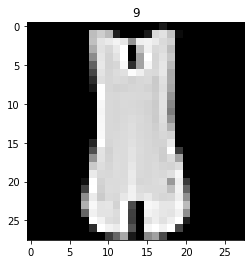

In [3]:
plt.imshow(imagens_treino[4], cmap='gray')
plt.title(identificacoes_treino[0])

### Verificando quantidade de labels

In [4]:
total_de_classificacoes = len(np.unique(identificacoes_treino))
total_de_classificacoes

10

### Sample de imagens

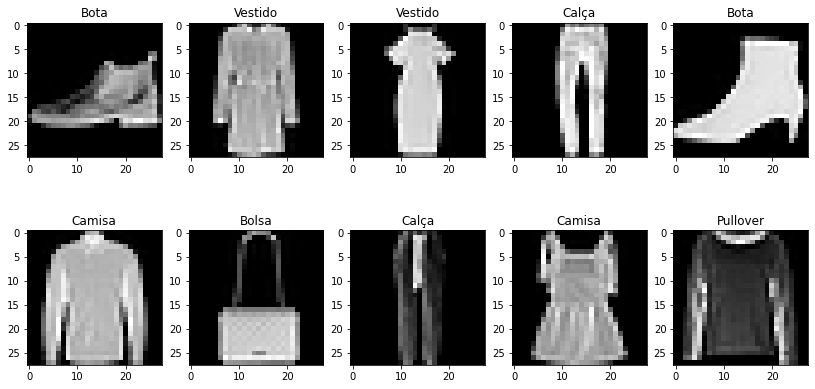

In [5]:
# Definindo nomes para as labels

nomes_labels = {
    0 : 'Camiseta',
    1 :	'Calça',
    2 :	'Pullover',
    3 :	'Vestido',
    4 :	'Casaco',
    5 :	'Sandalia',
    6 :	'Camisa',
    7 :	'Tenis',
    8 :	'Bolsa',
    9 :	'Bota'
}

imagens = np.random.uniform(0, 60000, 10).astype(int)
j = 1
plt.figure(figsize=(14,7))
for i in imagens:
    plt.subplot(2, 5, j)
    plt.imshow(imagens_treino[i], cmap='gray')
    plt.title(nomes_labels[identificacoes_treino[i]])
    j+=1



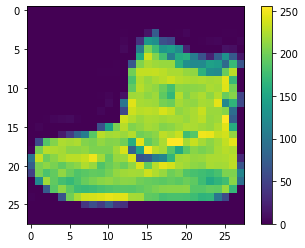

In [6]:
plt.imshow(imagens_treino[0])
plt.colorbar()

### Criação do modelo

In [ ]:
# Normalização
imagens_treino_normalizada = imagens_treino/255.0

### Criação, compilação, salvamento e ajuste do modelo com normalização

In [89]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(
    imagens_treino_normalizada, identificacoes_treino, 
    epochs=1, validation_split=0.2, 
    # Tecnica de salvamento de prioriza a melhor acurácia de validação                    
    callbacks=[tensorflow.keras.callbacks.ModelCheckpoint("./modelos_salvos/melhor_modelo.h5", monitor = 'val_accuracy', verbose = 1, save_best_only=True)])

1486/1500 [============================>.] - ETA: 0s - loss: 0.5309 - accuracy: 0.8122
Epoch 00001: val_accuracy improved from -inf to 0.80375, saving model to ./modelos_salvos\melhor_modelo.h5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5298 - accuracy: 0.8127 - val_loss: 0.5407 - val_accuracy: 0.8037


### Checando acuracia do modelo por épocas

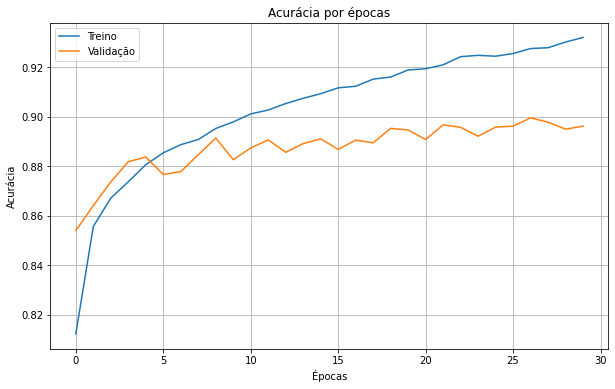

In [76]:
plt.figure(figsize=(10,6))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['Treino', 'Validação'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.grid()


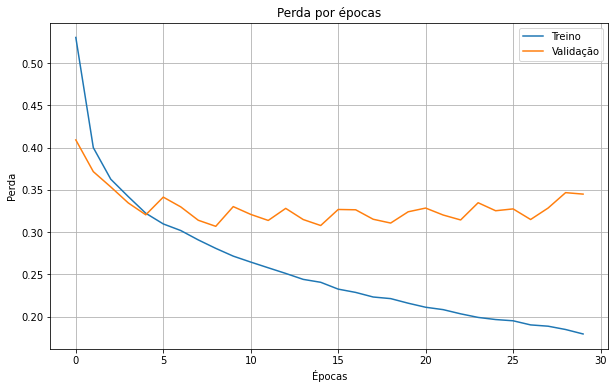

In [77]:
plt.figure(figsize=(10,6))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['Treino', 'Validação'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.grid()


### Teste específico do modelo

In [16]:
testes = modelo.predict(imangens_teste)
print(f'Resultado teste: {np.argmax(testes[1])}')
print(f'Classificacão real: {identificacoes_teste[1]}' )

Resultado teste: 2
Classificacão real: 2


In [78]:
modelo.evaluate(imangens_teste, identificacoes_teste)

313/313 [==============================] - 0s 1ms/step - loss: 92.4005 - accuracy: 0.8671


[92.40052032470703, 0.8671000003814697]

### Salvar modelo e carrega-lo

In [84]:
# Ta com bug, utilizar callback

modelo.save('modelo_com_bug.h5')


In [90]:
modelo_salvo = tensorflow.keras.models.load_model('./modelos_salvos/melhor_modelo.h5')
modelo_salvo.evaluate(imangens_teste, identificacoes_teste)

313/313 [==============================] - 0s 754us/step - loss: 114.1340 - accuracy: 0.1253


[114.13400268554688, 0.12530000507831573]